In [20]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_absolute_error
import warnings

In [21]:
df = pd.read_csv('housing.csv')

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [25]:
df['year'] = df['date'].dt.year

In [26]:
df['month'] = df['date'].dt.month

In [27]:
df['Day'] = df['date'].dt.day

In [28]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,Day
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [29]:
df.drop('lat',axis =1,inplace = True)

In [34]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year,month,Day
0,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,1340,5650,2014,10,13
1,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,1690,7639,2014,12,9
2,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,2720,8062,2015,2,25
3,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,1360,5000,2014,12,9
4,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,1800,7503,2015,2,18


In [35]:
df.drop('id',axis =1,inplace = True)
df.drop('long',axis =1,inplace = True)

KeyError: "['id'] not found in axis"

In [36]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'year', 'month', 'Day'],
      dtype='object')

In [37]:
x = df.iloc[:,1:]
x

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year,month,Day
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,2014,10,13
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,2014,12,9
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,2015,2,25
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,2014,12,9
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,2015,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,1530,1509,2014,5,21
21609,400000,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,1830,7200,2015,2,23
21610,402101,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,1020,2007,2014,6,23
21611,400000,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,1410,1287,2015,1,16


In [38]:
y = pd.DataFrame(df['price'])
y

,price
0,221900
1,538000
2,180000
3,604000
4,510000
...,...
21608,360000
21609,400000
21610,402101
21611,400000


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [40]:
x_train

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year,month,Day
1468,400000,4,1.50,1390,7200,1.0,0,0,3,7,1140,250,1965,0,98133,1630,7702,2014,5,29
15590,430000,3,1.50,1450,7316,1.0,0,0,3,7,1450,0,1961,0,98133,1440,7316,2015,3,17
18552,720000,5,2.75,2860,5379,2.0,0,0,3,9,2860,0,2005,0,98052,2980,6018,2014,8,11
10535,392500,2,1.00,1050,4125,1.0,0,0,4,7,1050,0,1909,0,98144,1650,4125,2014,9,26
1069,505000,2,1.00,1240,57000,1.0,0,0,3,7,1240,0,1962,0,98075,3050,25545,2014,7,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,1180000,5,5.00,3960,94089,2.0,0,0,3,10,3960,0,1998,0,98038,2240,64468,2014,10,7
19648,299000,2,2.50,1400,1262,2.0,0,0,3,8,1160,240,2008,0,98106,1060,1524,2014,11,18
9845,431000,3,2.25,2360,14950,1.0,0,0,4,9,2360,0,1978,0,98042,2720,14388,2014,8,20
10799,411000,4,2.00,2370,76665,2.0,0,0,4,8,2370,0,1978,0,98001,2110,19334,2014,7,2


In [41]:
x_test

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year,month,Day
17384,297000,2,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,1430,1650,2014,10,29
722,1578000,4,3.25,4670,51836,2.0,0,0,4,12,4670,0,1988,0,98005,4230,41075,2014,8,8
2680,562100,2,0.75,1440,3700,1.0,0,0,3,7,1200,240,1914,0,98107,1440,4300,2014,6,25
18754,631500,2,1.00,1130,2640,1.0,0,0,4,8,1130,0,1927,0,98109,1680,3200,2014,6,24
14554,780000,4,2.50,3180,9603,2.0,0,2,3,9,3180,0,2002,0,98155,2440,15261,2015,4,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18588,1100000,3,2.25,1560,8570,1.0,0,0,5,7,1080,480,1977,0,98004,2660,9621,2015,1,28
6784,700000,4,1.75,2360,6000,1.0,0,0,3,7,1280,1080,1955,0,98109,1700,3460,2015,3,25
14510,380000,3,2.50,2150,25705,1.5,0,0,3,6,2150,0,1980,2009,98058,1850,20160,2015,3,4
18917,268000,3,1.75,1480,8009,1.0,0,0,3,7,980,500,1980,0,98032,1790,7678,2014,8,25


In [42]:
y_train

,price
1468,400000
15590,430000
18552,720000
10535,392500
1069,505000
...,...
13123,1180000
19648,299000
9845,431000
10799,411000


In [43]:
y_test

,price
17384,297000
722,1578000
2680,562100
18754,631500
14554,780000
...,...
18588,1100000
6784,700000
14510,380000
18917,268000


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [48]:
x_train

array([[-0.38454326,  0.67170039, -0.79711466, ..., -0.69400104,
        -0.50110198,  1.54617505],
       [-0.3024967 , -0.38696772, -0.79711466, ...,  1.44092002,
        -1.14275851,  0.16121549],
       [ 0.49062007,  1.7303685 ,  0.82292131, ..., -0.69400104,
         0.46138281, -0.53126428],
       ...,
       [-0.29976181, -0.38696772,  0.17490692, ..., -0.69400104,
         0.46138281,  0.50745538],
       [-0.35445952,  0.67170039, -0.14910028, ..., -0.69400104,
         0.14055455, -1.56998395],
       [ 0.43564888,  0.67170039,  0.17490692, ..., -0.69400104,
         0.78221108,  0.73828197]])

In [49]:
x_test

array([[-0.66623646, -1.44563583, -0.79711466, ..., -0.69400104,
         1.10303934,  1.54617505],
       [ 2.83715177,  0.67170039,  1.47093569, ..., -0.69400104,
         0.46138281, -0.87750417],
       [ 0.05878167, -1.44563583, -1.76913625, ..., -0.69400104,
        -0.18027372,  1.08452186],
       ...,
       [-0.43924097, -0.38696772,  0.49891411, ...,  1.44092002,
        -1.14275851, -1.33915736],
       [-0.74554814, -0.38696772, -0.47310747, ..., -0.69400104,
         0.46138281,  1.08452186],
       [-0.91511104, -0.38696772, -1.44512905, ...,  1.44092002,
        -0.82193025,  0.16121549]])

In [52]:
def evaluate_model(true,predicted):
    mae = mean_squared_error(true,predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [53]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.0000
- Mean Absolute Error: 1.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.0134
- Mean Absolute Error: 1.0269
- R2 Score: 1.0000


Ridge
Model performance for Training set
- Root Mean Squared Error: 41.3890
- Mean Absolute Error: 1713.0458
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 42.8593
- Mean Absolute Error: 1836.9175
- R2 Score: 1.0000


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 98838.4019
- Mean Absolute Error: 9769029690.5447
- R2 Score: 0.9269
--

C:\Users\Pallavi\AppData\Local\Temp\ipykernel_16752\436931837.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train) # Train model


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 7477.4492
- Mean Absolute Error: 55912245.8173
- R2 Score: 0.9996
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 22465.1867
- Mean Absolute Error: 504684611.5584
- R2 Score: 0.9963




In [54]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
1,Lasso,1.000000
2,Ridge,1.000000
4,Decision Tree,0.996484
5,Random Forest Regressor,0.996324
3,K-Neighbors Regressor,0.888216


In [56]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(x_train, y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


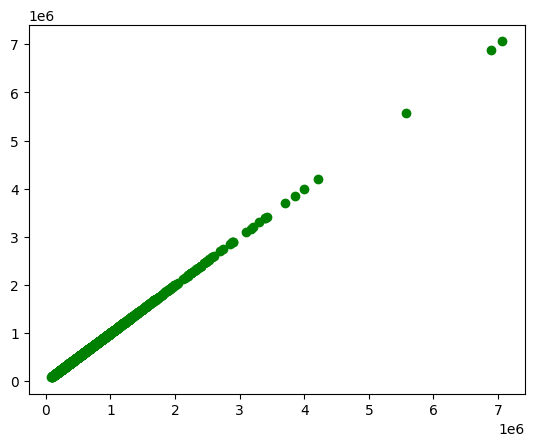

In [57]:
plt.scatter(y_test,y_pred,color = 'green')

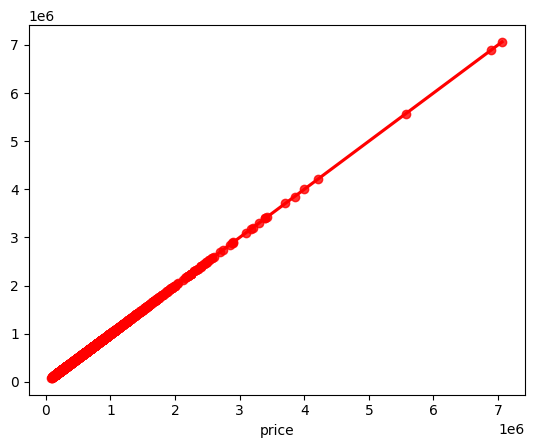

In [58]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');